import numpy as np

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as pt

In [3]:
import seaborn as sns

In [4]:
import re

In [5]:
import io

In [6]:
df=pd.read_csv('myexcel.csv.csv')
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [8]:
df.fillna('Unknown')

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,Unknown
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,Unknown,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,Unknown,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,Unknown,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [9]:
df.describe()

,Number,Age,Weight,Salary
count,458.000000,458.000000,458.000000,4.470000e+02
mean,17.713974,26.934498,221.543668,4.833970e+06
std,15.966837,4.400128,26.343200,5.226620e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.025210e+06
50%,13.000000,26.000000,220.000000,2.836186e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [10]:
df.describe(include="all")

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
count,458,458,458.000000,458,458.000000,458,458.000000,374,4.470000e+02
unique,458,30,NaN,5,NaN,18,NaN,118,NaN
top,Avery Bradley,New Orleans Pelicans,NaN,SG,NaN,06-Sep,NaN,Kentucky,NaN
freq,1,19,NaN,102,NaN,59,NaN,22,NaN
mean,NaN,NaN,17.713974,NaN,26.934498,NaN,221.543668,NaN,4.833970e+06
std,NaN,NaN,15.966837,NaN,4.400128,NaN,26.343200,NaN,5.226620e+06
min,NaN,NaN,0.000000,NaN,19.000000,NaN,161.000000,NaN,3.088800e+04
25%,NaN,NaN,5.000000,NaN,24.000000,NaN,200.000000,NaN,1.025210e+06
50%,NaN,NaN,13.000000,NaN,26.000000,NaN,220.000000,NaN,2.836186e+06
75%,NaN,NaN,25.000000,NaN,30.000000,NaN,240.000000,NaN,6.500000e+06


In [11]:
df.shape

(458, 9)

In [12]:
df.head(15)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
5,Amir Johnson,Boston Celtics,90,PF,29,06-Sep,240,NaN,12000000.0
6,Jordan Mickey,Boston Celtics,55,PF,21,06-Aug,235,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41,C,25,7-0,238,Gonzaga,2165160.0
8,Terry Rozier,Boston Celtics,12,PG,22,06-Feb,190,Louisville,1824360.0
9,Marcus Smart,Boston Celtics,36,PG,22,06-Apr,220,Oklahoma State,3431040.0


In [13]:
df.tail(10)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
448,Gordon Hayward,Utah Jazz,20,SF,26,06-Aug,226,Butler,15409570.0
449,Rodney Hood,Utah Jazz,5,SG,23,06-Aug,206,Duke,1348440.0
450,Joe Ingles,Utah Jazz,2,SF,28,06-Aug,226,NaN,2050000.0
451,Chris Johnson,Utah Jazz,23,SF,26,06-Jun,206,Dayton,981348.0
452,Trey Lyles,Utah Jazz,41,PF,20,06-Oct,234,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0
457,Priyanka,Utah Jazz,34,C,25,07-Mar,231,Kansas,947276.0


In [14]:
df.isnull()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
453,False,False,False,False,False,False,False,False,False
454,False,False,False,False,False,False,False,True,False
455,False,False,False,False,False,False,False,True,False
456,False,False,False,False,False,False,False,False,False


In [15]:
df[['Name','Team']]

,Name,Team
0,Avery Bradley,Boston Celtics
1,Jae Crowder,Boston Celtics
2,John Holland,Boston Celtics
3,R.J. Hunter,Boston Celtics
4,Jonas Jerebko,Boston Celtics
...,...,...
453,Shelvin Mack,Utah Jazz
454,Raul Neto,Utah Jazz
455,Tibor Pleiss,Utah Jazz
456,Jeff Withey,Utah Jazz


In [16]:
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [17]:
df["Salary"].fillna(0,inplace=True)

In [18]:
df.head(25)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,0.0
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
5,Amir Johnson,Boston Celtics,90,PF,29,06-Sep,240,NaN,12000000.0
6,Jordan Mickey,Boston Celtics,55,PF,21,06-Aug,235,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41,C,25,7-0,238,Gonzaga,2165160.0
8,Terry Rozier,Boston Celtics,12,PG,22,06-Feb,190,Louisville,1824360.0
9,Marcus Smart,Boston Celtics,36,PG,22,06-Apr,220,Oklahoma State,3431040.0


In [19]:
df['College'].fillna('Unknown',inplace=True)

In [20]:
df['Team'].value_counts()

Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

In [21]:
df['Height']

0      06-Feb
1      06-Jun
2      06-May
3      06-May
4      06-Oct
        ...  
453    06-Mar
454    06-Jan
455    07-Mar
456       7-0
457    07-Mar
Name: Height, Length: 458, dtype: object

In [22]:
df['Height']=np.random.uniform(150,180,size=len(df))
df

NameError: name 'np' is not defined

In [ ]:
#1.How many are there in each Team and the percentage splitting with respect to the total employees.

In [ ]:
df1=df[['Name','Team']]
df1=pd.DataFrame(df1)
df1

In [23]:
team_count=df['Team'].value_counts()

In [24]:
team_count

Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

In [25]:
percentage=(team_count/len(df1)*100)
percentage

NameError: name 'df1' is not defined

In [26]:
#2Segregate the employees w.r.t different positions.

In [27]:
df[['Name','Position']]

,Name,Position
0,Avery Bradley,PG
1,Jae Crowder,SF
2,John Holland,SG
3,R.J. Hunter,SG
4,Jonas Jerebko,PF
...,...,...
453,Shelvin Mack,PG
454,Raul Neto,PG
455,Tibor Pleiss,C
456,Jeff Withey,C


In [28]:
df['Position'].value_counts

<bound method IndexOpsMixin.value_counts of 0      PG
1      SF
2      SG
3      SG
4      PF
       ..
453    PG
454    PG
455     C
456     C
457     C
Name: Position, Length: 458, dtype: object>

In [29]:
#3.Find from which age group most of the employees belong to

In [30]:
df[['Name','Age']]

,Name,Age
0,Avery Bradley,25
1,Jae Crowder,25
2,John Holland,27
3,R.J. Hunter,22
4,Jonas Jerebko,29
...,...,...
453,Shelvin Mack,26
454,Raul Neto,24
455,Tibor Pleiss,26
456,Jeff Withey,26


In [31]:
df['Age'].value_counts().head(1)

Age
24    47
Name: count, dtype: int64

In [32]:
#4.Find out under which team and position, spending in terms of salary is high.

In [33]:
df['Salary'].fillna(0,inplace=True)

In [34]:
df1=df[['Team','Position','Salary']]
df1

,Team,Position,Salary
0,Boston Celtics,PG,7730337.0
1,Boston Celtics,SF,6796117.0
2,Boston Celtics,SG,0.0
3,Boston Celtics,SG,1148640.0
4,Boston Celtics,PF,5000000.0
...,...,...,...
453,Utah Jazz,PG,2433333.0
454,Utah Jazz,PG,900000.0
455,Utah Jazz,C,2900000.0
456,Utah Jazz,C,947276.0


In [35]:
df1=df[['Team','Position','Salary']]
df1=pd.DataFrame(df1)
df1

,Team,Position,Salary
0,Boston Celtics,PG,7730337.0
1,Boston Celtics,SF,6796117.0
2,Boston Celtics,SG,0.0
3,Boston Celtics,SG,1148640.0
4,Boston Celtics,PF,5000000.0
...,...,...,...
453,Utah Jazz,PG,2433333.0
454,Utah Jazz,PG,900000.0
455,Utah Jazz,C,2900000.0
456,Utah Jazz,C,947276.0


In [36]:
team_position_salary=df1.groupby(['Team','Position','Salary'])['Salary'].sum()
team_position_salary

Team                Position  Salary    
Atlanta Hawks       C         1000000.0      1000000.0
                              9756250.0      9756250.0
                              12000000.0    12000000.0
                    PF        947276.0        947276.0
                              1000000.0      1000000.0
                                               ...    
Washington Wizards  SF        4662960.0      4662960.0
                    SG        561716.0        561716.0
                              1100602.0      1100602.0
                              4000000.0      4000000.0
                              5694674.0      5694674.0
Name: Salary, Length: 452, dtype: float64

In [37]:
Team_salary=df1.groupby(["Team","Position"])["Salary"].sum()
Team_salary

Team                Position
Atlanta Hawks       C           22756250.0
                    PF          23952268.0
                    PG           9763400.0
                    SF           6000000.0
                    SG          10431032.0
                                   ...    
Washington Wizards  C           24490429.0
                    PF          11300000.0
                    PG          18022415.0
                    SF          11158800.0
                    SG          11356992.0
Name: Salary, Length: 149, dtype: float64

In [38]:
Team_salary.sort_values().tail()

Team                Position
Denver Nuggets      SF          27982771.0
Phoenix Suns        PG          28002998.0
Houston Rockets     SG          28122883.0
Miami Heat          PF          31538671.0
Los Angeles Lakers  SF          31866445.0
Name: Salary, dtype: float64

In [39]:
#5.Find if there is any correlation between age and salary , represent it visually.

In [40]:
correlation=df['Age'].corr(df['Salary'])
correlation

0.20500960284809364

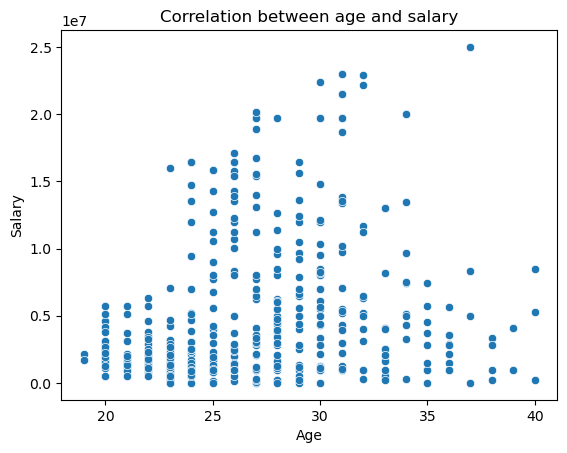

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x='Age',y='Salary',data=df)
plt.title("Correlation between age and salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

In [42]:
df1

,Team,Position,Salary
0,Boston Celtics,PG,7730337.0
1,Boston Celtics,SF,6796117.0
2,Boston Celtics,SG,0.0
3,Boston Celtics,SG,1148640.0
4,Boston Celtics,PF,5000000.0
...,...,...,...
453,Utah Jazz,PG,2433333.0
454,Utah Jazz,PG,900000.0
455,Utah Jazz,C,2900000.0
456,Utah Jazz,C,947276.0


In [43]:
df1.isnull().sum()

Team        0
Position    0
Salary      0
dtype: int64

In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Team      458 non-null    object 
 1   Position  458 non-null    object 
 2   Salary    458 non-null    float64
dtypes: float64(1), object(2)
memory usage: 10.9+ KB


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   458 non-null    object 
 8   Salary    458 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [46]:
df.to_csv("Module_end_project.csv")